In [104]:
from tsetmc import Ticker

ticker = Ticker("فولاد")

# get trade history:
df = ticker.trade_history(adjust=True).iloc[1:]
df = df.astype("int32")

# filter low trade days:
df = df[df["count"] > 50]

# Close Change Percent:
df["ccp"] = (df["close"] - df["yesterday"]) / df["yesterday"] * 100

# close-price and last-price difference in yesterday:
df["yesterday_diff"] = (df["last"] - df["close"]) / df["yesterday"] * 100
df["yesterday_diff"] = df["yesterday_diff"].shift(1)

df

no data for  None


,high,low,close,last,first,yesterday,value,volume,count,ccp,yesterday_diff
2007-03-12,76,76,76,76,76,75,605929680,100041000,9214,1.333333,NaN
2007-03-13,78,75,78,78,78,76,133401359,126270939,5862,2.631579,0.000000
2007-03-14,77,76,76,76,76,78,126771899,26705128,1901,-2.564103,0.000000
2007-03-17,76,75,75,75,75,76,-1825764283,14877283,1514,-1.315789,0.000000
2007-03-19,75,73,74,74,74,75,1957208502,12428574,1402,-1.333333,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2022-06-11,11340,11150,11290,11310,11260,11290,106442040,60888112,6432,0.000000,0.177305
2022-06-12,11700,11200,11460,11540,11300,11290,1672765640,71378541,7088,1.505757,0.177148
2022-06-13,12100,11600,11820,11660,11600,11460,757707316,106858966,10013,3.141361,0.708592
2022-06-14,11910,11640,11820,11820,11750,11820,587595066,66911238,5887,0.000000,-1.396161


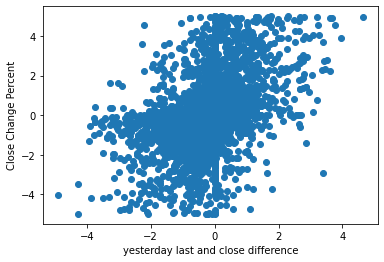

In [105]:
import matplotlib.pyplot as plt 

# drop outlier data:
df = df[(df["ccp"] <= 5) & (df["ccp"] >= -5)]
df = df[(df["yesterday_diff"] < 5) & (df["yesterday_diff"] > -5)]

# plotting:
plt.xlabel("yesterday last and close difference")
plt.ylabel("Close Change Percent")
plt.scatter(df["yesterday_diff"], df["ccp"])

In [106]:
# correlation:
corr = df.corr().loc["ccp", "yesterday_diff"] * 100
print("correlation: ", corr)

correlation:  42.58298255327796
